<a href="https://colab.research.google.com/github/shyamsolanke/ds_hw/blob/main/Rough_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
# Step 1: Load the dataset
file_path = '/content/EDA_3.csv'
df = pd.read_csv(file_path)

In [3]:
# Label Encoding
encoder = LabelEncoder()

df_encode = df.copy()

for col in df_encode.columns:
	if df_encode[col].dtype in ['O', 'object', 'category']:
		df_encode[col]= encoder.fit_transform(df_encode[col])

In [4]:
y=df['Driver At Fault']
y = encoder.fit_transform(y)

In [5]:
df_encode.drop(labels=['Driver At Fault'], axis=1, inplace=True)

In [6]:
Scaler = StandardScaler()
scaled_x = Scaler.fit_transform(df_encode)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.4, random_state=42, stratify=y)

## Support Vector Machine

Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
Confusion Matrix:
[[29067  4546]
 [ 7677 30849]]


<Axes: >

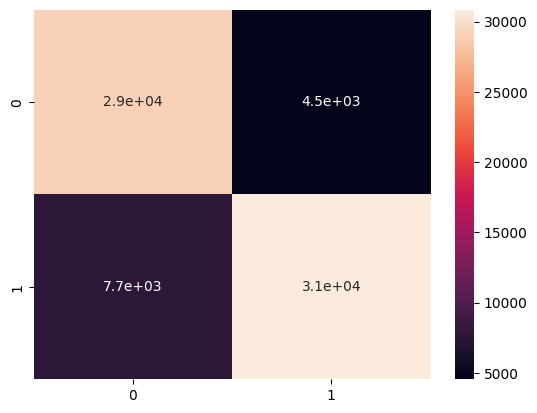

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns

# Define the SVM model
model = SVC(random_state=42)

model.fit(X_train, y_train)

# # Define the parameter grid for SVM
# param_grid = {
#     'C': [0.1, 1, 10],  # Regularization parameter
#     'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
#     'gamma': ['scale', 'auto']  # Kernel coefficient
# }

# # Perform Grid Search with Cross Validation
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best Parameters:", grid_search.best_params_)

# Use the best model
# best_model = grid_search.best_estimator_

best_model = model

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
confusion = confusion_matrix(y_test, y_pred)
score = best_model.score(X_test, y_test)

# Print results
print(f"Accuracy: {accuracy:.2f}")  # Format to 2 decimal places
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix
sns.heatmap(confusion, annot=True)


## Naive Bayes


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1 Score: 0.76
